In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from doepy import build
import pandas as pd

This code was used to build the original set of 50 samples. Be careful to not overwrite the original samples table if you rerun this cell!

In [12]:
samples = build.space_filling_lhs(
    {
        "lambda_x": [0.5, 30], #500 um to 3 cm
        "ratio_lambda_y_x": [0.1, 1], # lambda_y = ratio * lambda_x (ie lambda_y is less than or equal to lambda_x)
        "lambda_z": [0.5, 30],
        "theta_x": [0, 90], #rotation about x axis, degrees
        "theta_y":[0, 90], #rotation about y axis, degrees
        "porosity": [0, 0.95], #free volume in structure. 0 = solid, 0.95 = only 5% of the volume is solid
    },
    num_samples=25, #number of structures to generate across the space
)

# samples.to_csv("20231204 initial 25 samples.csv", index=False)
samples.head()

,lambda_x,ratio_lambda_y_x,lambda_z,theta_x,theta_y,porosity
0,25.083333,0.4750,20.166667,15.00,60.00,0.356250
1,28.770833,0.2875,30.000000,67.50,0.00,0.791667
2,21.395833,0.5500,26.312500,7.50,45.00,0.870833
3,30.000000,0.2500,5.416667,86.25,3.75,0.475000
4,2.958333,0.1000,10.333333,30.00,63.75,0.593750


In [13]:
samples = pd.read_csv("20231204 initial 25 samples.csv")
samples.head()

,lambda_x,ratio_lambda_y_x,lambda_z,theta_x,theta_y,porosity
0,25.083333,0.4750,20.166667,15.00,60.00,0.356250
1,28.770833,0.2875,30.000000,67.50,0.00,0.791667
2,21.395833,0.5500,26.312500,7.50,45.00,0.870833
3,30.000000,0.2500,5.416667,86.25,3.75,0.475000
4,2.958333,0.1000,10.333333,30.00,63.75,0.593750


See how the 50 samples are evenly distributed across the design space

c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

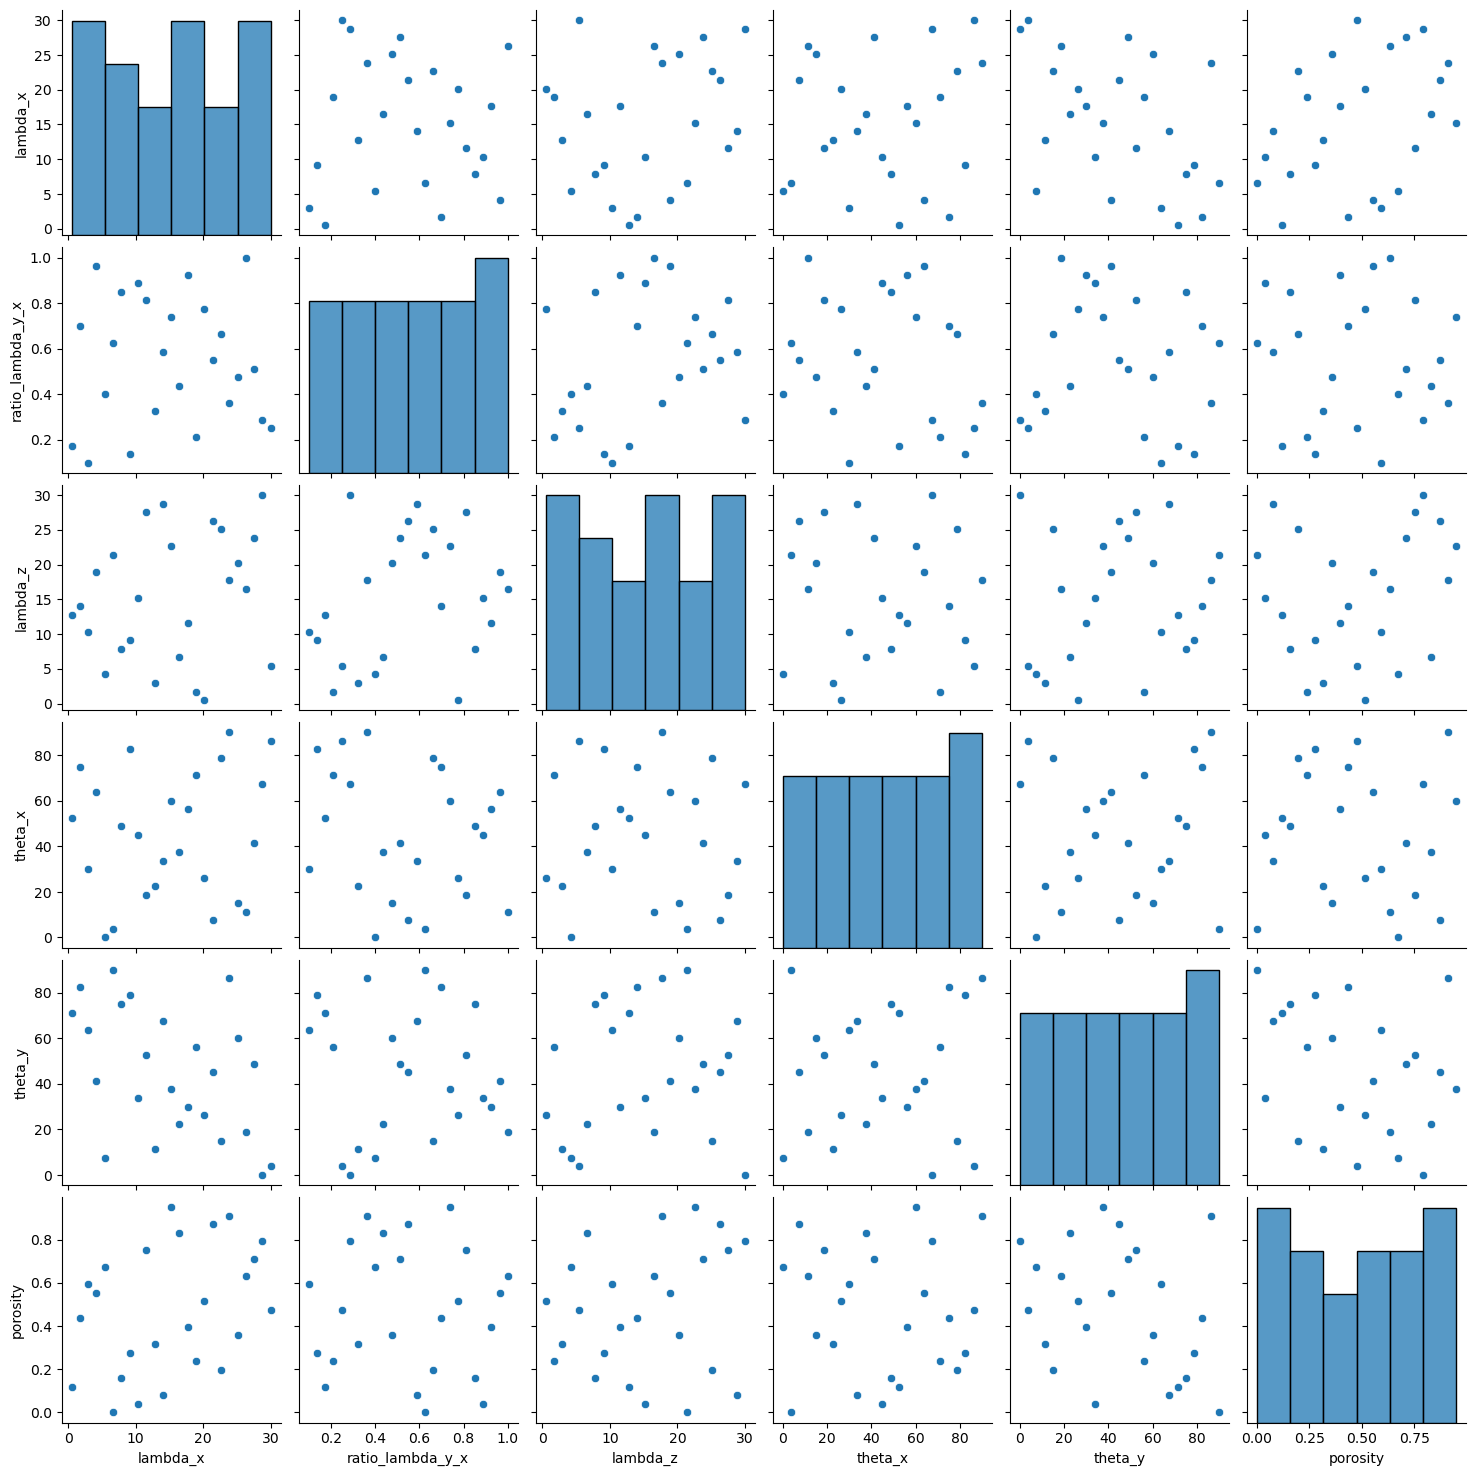

In [14]:
sns.pairplot(samples)

# Generate the STL files for the initial 25 structures

This can take some time to run. We use the same initial 25 parameters for both diamond and gyroid structures, yielding a total of 50 structures (25 for each class of TPMS).

## Gyroid structures

In [15]:
from spartantpms import gyroid_box, generate_stl

In [16]:
for structure_number, row in samples.iterrows():
    f = gyroid_box(
        lambda_x = row["lambda_x"],
        lambda_y = row["lambda_x"] * row["ratio_lambda_y_x"],
        lambda_z=row["lambda_z"],
        theta_x=row["theta_x"],
        theta_y=row["theta_y"],
        theta_z=0, #rotation about z is degenerate when stressing along z axis.
        porosity=row["porosity"],
        n_periods=4
    )
    
    generate_stl(
        f=f,
        fpath=f"gyroid_{structure_number}.stl",
        step=0.2
    )

min -57.9724, -30.4355, -47.3441
max 57.9724, 30.4355, 47.3441
step 0.2, 0.2, 0.2
Wrote file to gyroid_0.stl
min -67.6344, -23.1889, -67.6344
max 67.6344, 23.1889, 67.6344
step 0.2, 0.2, 0.2
Wrote file to gyroid_1.stl
min -47.3441, -30.4355, -59.1801
max 47.3441, 30.4355, 59.1801
step 0.2, 0.2, 0.2
Wrote file to gyroid_2.stl
min -67.6344, -20.2903, -15.4593
max 67.6344, 20.2903, 15.4593
step 0.2, 0.2, 0.2
Wrote file to gyroid_3.stl
min -7.24655, -2.11358, -23.1889
max 7.24655, 2.11358, 23.1889
step 0.2, 0.2, 0.2
Wrote file to gyroid_4.stl
min -35.5081, -16.9086, -16.9086
max 35.5081, 16.9086, 16.9086
step 0.2, 0.2, 0.2
Wrote file to gyroid_5.stl
min -59.1801, -59.1801, -40.5807
max 59.1801, 59.1801, 40.5807
step 0.2, 0.2, 0.2
Wrote file to gyroid_6.stl
min -46.3779, -35.5081, -4.43851
max 46.3779, 35.5081, 4.43851
step 0.2, 0.2, 0.2
Wrote file to gyroid_7.stl
min -47.3441, -35.5081, -57.9724
max 47.3441, 35.5081, 57.9724
step 0.2, 0.2, 0.2
Wrote file to gyroid_8.stl
min -11.5945, -5.79

## Diamond structures

In [17]:
from spartantpms import diamond_box, generate_stl

In [18]:
for structure_number, row in samples.iterrows():
    f = diamond_box(
        lambda_x = row["lambda_x"],
        lambda_y = row["lambda_x"] * row["ratio_lambda_y_x"],
        lambda_z=row["lambda_z"],
        theta_x=row["theta_x"],
        theta_y=row["theta_y"],
        theta_z=0, #rotation about z is degenerate when stressing along z axis.
        porosity=row["porosity"],
        n_periods=4
    )
    
    generate_stl(
        f=f,
        fpath=f"diamond_{structure_number}.stl",
        step=0.2
    )

min -57.9724, -30.4355, -47.3441
max 57.9724, 30.4355, 47.3441
step 0.2, 0.2, 0.2
Wrote file to diamond_0.stl
min -67.6344, -23.1889, -67.6344
max 67.6344, 23.1889, 67.6344
step 0.2, 0.2, 0.2
Wrote file to diamond_1.stl
min -47.3441, -30.4355, -59.1801
max 47.3441, 30.4355, 59.1801
step 0.2, 0.2, 0.2
Wrote file to diamond_2.stl
min -67.6344, -20.2903, -15.4593
max 67.6344, 20.2903, 15.4593
step 0.2, 0.2, 0.2
Wrote file to diamond_3.stl
min -7.24655, -2.11358, -23.1889
max 7.24655, 2.11358, 23.1889
step 0.2, 0.2, 0.2
Wrote file to diamond_4.stl
min -35.5081, -16.9086, -16.9086
max 35.5081, 16.9086, 16.9086
step 0.2, 0.2, 0.2
Wrote file to diamond_5.stl
min -59.1801, -59.1801, -40.5807
max 59.1801, 59.1801, 40.5807
step 0.2, 0.2, 0.2
Wrote file to diamond_6.stl
min -46.3779, -35.5081, -4.43851
max 46.3779, 35.5081, 4.43851
step 0.2, 0.2, 0.2
Wrote file to diamond_7.stl
min -47.3441, -35.5081, -57.9724
max 47.3441, 35.5081, 57.9724
step 0.2, 0.2, 0.2
Wrote file to diamond_8.stl
min -11.59